## Group 6 - Math for AI, AI23 @ HCMUS
- 23122013 - Đinh Đức Tài
- 23122002 - Nguyễn Đình Hà Dương
- 23122004 - Nguyễn Lê Hoàng Trung
- 23122014 - Hoàng Minh Trung

## [Lab1] Linear Regression

## Part 0: Import libs, define DataProcessor and functions

#### 0.1: Import libs: Numpy, Pandas, Matplotlib

In [4]:
# Importing the libraries: numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

#### 0.2: Create class DataProcessor

In [6]:
class DataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.original = True

    def load_data(self):
        """Load data from the CSV file."""
        self.data = pd.read_csv(self.file_path)
        print("Data loaded successfully!")
        return self.data
    
    def get_summary(self):
        """Print a summary of the data."""
        print("Number of rows:", len(self.data))
        print("Column names:", self.data.columns.tolist())
        return self.data.describe()
    
    def head(self, n = 5):
        """Return the first n rows of the data."""
        return self.data.head(n)
    
    def null_info(self):
        """Print information about missing values."""
        print("\nNumber of rows with NaN values:", self.data.isna().any(axis=1).sum())

    def get_column_initial_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
                "Dung tích bình nhiên liệu (lít)"
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info
    
    def get_column_after_transform_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
                "Dung tích bình nhiên liệu (lít)", 'Vòng tua tại Công suất tối đa (rpm)',
                'Vòng tua tại Mô-men xoắn tối đa (rpm)',
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

#### 0.3: Get infomation about unique values functions

In [10]:
def get_some_unique_values(self):
    print("\nUnique values of some columns:")
    print("Fuel Type:", self.data['Fuel Type'].unique())
    print("Transmission:", self.data['Transmission'].unique())
    print("Seller Type:", self.data['Seller Type'].unique())
    print("Drivetrain:", self.data['Drivetrain'].unique())

    print("Owner:", self.data['Owner'].unique())
    print("Seating Capacity:", self.data['Seating Capacity'].unique())

def unique_values(self):
    object_columns = self.data.select_dtypes(include=['object']).columns
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns

    # List of object columns and their unique values
    object_columns_list = [(col, self.data[col].nunique()) for col in object_columns]

    # List of numeric columns and their unique values
    numeric_columns_list = [(col, self.data[col].nunique()) for col in numeric_columns]

    print("Object Columns and number of unique values: {}".format(len(object_columns_list)))
    print(object_columns_list)

    print("\nNumeric Columns and number of unique values: {}".format(len(numeric_columns_list)))
    print(numeric_columns_list)
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns
    return numeric_columns, object_columns

DataProcessor.get_some_unique_values = get_some_unique_values
DataProcessor.unique_values = unique_values

#### 0.4: Clean and transform data functions

In [13]:
def clean_data(self):
    """Clean the data by handling missing values and duplicates."""
    # Handle missing values
    # Fill numeric columns with their mean
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean().astype(int))

    # Fill categorical columns with the most frequent value
    categorical_columns = self.data.select_dtypes(include=['object']).columns
    self.data[categorical_columns] = self.data[categorical_columns].fillna(self.data[categorical_columns].mode().iloc[0])

    # Remove duplicates
    self.data = self.data.drop_duplicates()

    # Reset index after cleaning
    self.data.reset_index(drop=True, inplace=True)

    # Print summary after cleaning
    print("Data cleaned successfully!")
    print("Number of rows after cleaning:", len(self.data))
    print("Number of missing values after cleaning:", self.data.isna().sum().sum())

def transform_data(self):
    """Transform data by standardizing specific columns."""
    # 'Engine' ('cc') -> float
    self.data['Engine'] = self.data['Engine'].astype(str).str.replace(' cc', '').astype(float)

    # Extract RPM values from the original string values before conversion
    if (self.original is True):
        self.data['rpm at Max Power'] = (
            self.data['Max Power']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
        self.data['rpm at Max Torque'] = (
            self.data['Max Torque']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
    self.original = False

    # Fill missing values with the most frequent value
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].fillna(self.data['rpm at Max Power'].mode().iloc[0])
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].fillna(self.data['rpm at Max Torque'].mode().iloc[0])

    # 'rpm at Max Power' -> int
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].astype(int)

    # 'rpm at Max Torque' -> int
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].astype(int)
    
    # 'Max Power' ('bhp') -> int
    self.data['Max Power'] = self.data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Max Torque' ('Nm') -> int
    self.data['Max Torque'] = self.data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Seating Capacity' -> int
    self.data['Seating Capacity'] = self.data['Seating Capacity'].astype(int)

    # 'Fuel Tank Capacity' -> int
    self.data['Fuel Tank Capacity'] = self.data['Fuel Tank Capacity'].astype(int)

    # 'Owner' -> int
    self.data['Owner'] = self.data['Owner'].map({
        'UnRegistered Car': 0,
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth': 4,
        '4 or More': 5,
        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
    })

    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

    print("Data transformed successfully!")
    print("\nData Transformation Details:")
    print("- 'Engine' (cc) converted to float.")
    print("- 'Max Power' (bhp) converted to integer.")
    print("- 'Max Torque' (Nm) converted to integer.")
    print("- Add 'rpm at Max Power' and converted to integer.")
    print("- Add 'rpm at Max Torque' and converted to integer.")
    print("- 'Seating Capacity' converted to integer.")
    print("- 'Fuel Tank Capacity' converted to integer.")
    print("- 'Owner' converted to numerical categories.")

DataProcessor.clean_data = clean_data
DataProcessor.transform_data = transform_data

#### 0.5: Data visualization functions

In [16]:
def plot_corr_matrix(self, width=12, height=8):
    # Compute the correlation matrix using only numeric features
    corr_matrix = self.data[self.numeric_columns].corr()

    # Plot the correlation matrix using matplotlib
    plt.figure(figsize=(width, height))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Correlation Matrix of Numeric Features")

    # Annotate the matrix with correlation coefficients
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_distribution_of_numeric_columns(self):
    # Plot histograms for all numeric columns
    num_cols = self.numeric_columns

    num_cols_count = len(num_cols)
    n_cols = 3  # Number of columns in the figure
    n_rows = (num_cols_count + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3.5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(num_cols):
        axes[i].hist(self.data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def box_plot_for_object_columns(self):
    for col in self.object_columns:
        if (col == 'Model'): 
            continue
        plt.figure(figsize=(12, 3))
        categories = self.data[col].unique()
        groups = [self.data.loc[self.data[col] == category, 'Price'] for category in categories]
        plt.boxplot(groups, patch_artist=True, tick_labels=categories)
        plt.title(f'Box Plot: Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        if (col == 'Location'):
            plt.xticks(rotation=90)
        elif (col == 'Fuel Type' or col == 'Transmission' or col == 'Seller Type' or col == 'Drivetrain'):
            plt.xticks(rotation=0)
        else:
            plt.xticks(rotation=60)
        plt.show()

def scatter_plot_for_numeric_columns(self):
    cols = [col for col in self.numeric_columns if col != 'Price']
    n_plots = len(cols)
    n_cols = 3
    n_rows = int(n_plots / n_cols) + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        axes[i].scatter(self.data[col], self.data['Price'], alpha=0.5, color='blue', edgecolors='k')
        axes[i].set_title(f'Relationship between Price and {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

DataProcessor.plot_corr_matrix = plot_corr_matrix
DataProcessor.plot_distribution_of_numeric_columns = plot_distribution_of_numeric_columns
DataProcessor.box_plot_for_object_columns = box_plot_for_object_columns
DataProcessor.scatter_plot_for_numeric_columns = scatter_plot_for_numeric_columns

#### 0.6: Split dataset to train set and validation set

In [19]:
def train_valid_split(self, valid_size=0.2, random_state=None):
    """Split the data into training and validation sets."""
    train_set = copy.deepcopy(self)
    valid_set = copy.deepcopy(self)
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle indices and compute the split index
    indices = np.arange(len(self.data))
    np.random.shuffle(indices)
    split_idx = int((1 - valid_size) * len(self.data))

    # Split the data into training and validation sets
    train_indices = indices[:split_idx]
    valid_indices = indices[split_idx:]
    train_set.data = self.data.iloc[train_indices].reset_index(drop=True)
    valid_set.data = self.data.iloc[valid_indices].reset_index(drop=True)

    return train_set, valid_set

DataProcessor.train_valid_split = train_valid_split

#### 0.7: Data Encoding

In [22]:
def encode_data(self):
    """
    Mã hóa các biến theo yêu cầu:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make
    make_median = self.data.groupby('Make')['Price'].median()
    self.data['Make'] = self.data['Make'].map(make_median)
    
    # Mẫu xe: map giá trung vị theo Model
    model_median = self.data.groupby('Model')['Price'].median()
    self.data['Model'] = self.data['Model'].map(model_median)
    
    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)
    
    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)
    
    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = self.data['Price'].median()
    location_medians = self.data.groupby('Location')['Price'].median()
    def encode_location(loc):
        return 1 if location_medians.loc[loc] >= global_median_price else 0
    self.data['Location'] = self.data['Location'].apply(encode_location)
    
    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)
    
    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)
    
    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = {'FWD': 1, 'RWD': 2, 'AWD': 3}
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)
    
    print("Data encoding completed!")
    
# Gắn hàm encode_data vào class DataProcessor
DataProcessor.encode_data = encode_data

#### 0.8: Data Normalization

In [25]:
def normalize_data(self):
    """
    Chuẩn hóa các feature dữ liệu:
    - Áp dụng log transformation cho 'Price' và 'Year' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """

    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Price Norm'] = np.log1p(self.data['Price'])
    self.data['Year'] = np.log1p(self.data['Year'])
    
    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price', 'Price Norm'])
    
    min_vals = self.data[numeric_cols].min()
    max_vals = self.data[numeric_cols].max()
    range_vals = max_vals - min_vals
    # Avoid division by zero by replacing 0 differences with 1
    range_vals[range_vals == 0] = 1
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals
    
    self.unique_values()
    print("Data normalization completed!")
    
DataProcessor.normalize_data = normalize_data

## Part I: Load and Explore data (train.csv)
In this part, we will load and explore some information about the original data.

In [28]:
# Initialize the DataProcessor class and load the data (train.csv)
file_path = './data/train.csv'
data = DataProcessor(file_path)
data.load_data()

# Print summary of the data
print("\nSummary of the data:")
data.get_summary()

# First 5 rows of data
print("\nFirst 5 rows of data:")
data.head()

Data loaded successfully!

Summary of the data:
Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [30]:
# Print information about the null values
data.null_info()

# Print information about the columns
data.get_column_initial_info()


Number of rows with NaN values: 149

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,object,0,6,First


In [32]:
# Print the unique values of some columns
data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: [nan 'RWD' 'FWD' 'AWD']
Owner: ['Second' 'First' 'Third' 'UnRegistered Car' '4 or More' 'Fourth']
Seating Capacity: [nan  5.  7.  2.  6.  8.  4.]


## Part II: Data Preprocessing
In this part, we will fill NaN values and perform some data transformation.

#### II.0: Split dataset

In [36]:
train_data, valid_data = data.train_valid_split(valid_size=0.2, random_state=0)

#### II.1: Data cleaning

In [39]:
# Clean the data and fill missing values
train_data.clean_data()
valid_data.clean_data()

Data cleaned successfully!
Number of rows after cleaning: 1317
Number of missing values after cleaning: 0
Data cleaned successfully!
Number of rows after cleaning: 330
Number of missing values after cleaning: 0


#### II.2: Data Transformation

In [42]:
# Transform the data
train_data.transform_data()
valid_data.transform_data()

Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.
Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.


#### II.3: Explore train data after preprocessing

In [45]:
train_data.get_column_after_transform_info()


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,785,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,504,425000.0
3,Year,Năm sản xuất,int64,0,19,2017.0
4,Kilometer,Số km đã đi,int64,0,586,65000
5,Fuel Type,Loại nhiên liệu,object,0,7,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,75,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1.0


In [47]:
train_data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'Electric' 'Hybrid' 'LPG' 'CNG + CNG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Commercial Registration' 'Corporate']
Drivetrain: ['RWD' 'AWD' 'FWD']
Owner: [1 2 3 0 5 4]
Seating Capacity: [5 7 4 6 8 2]


In [49]:
# Print number of unique values for each column
numeric_columns, object_columns = train_data.unique_values()
train_data_after_preprocessing = copy.deepcopy(train_data)
validation_data_after_preprocessing = copy.deepcopy(valid_data)

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 785), ('Fuel Type', 7), ('Transmission', 2), ('Location', 75), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 8
[('Price', 504), ('Year', 19), ('Kilometer', 586), ('Owner', 6), ('Engine', 98), ('Length', 216), ('Width', 150), ('Height', 180)]


## Part III: Data visualization

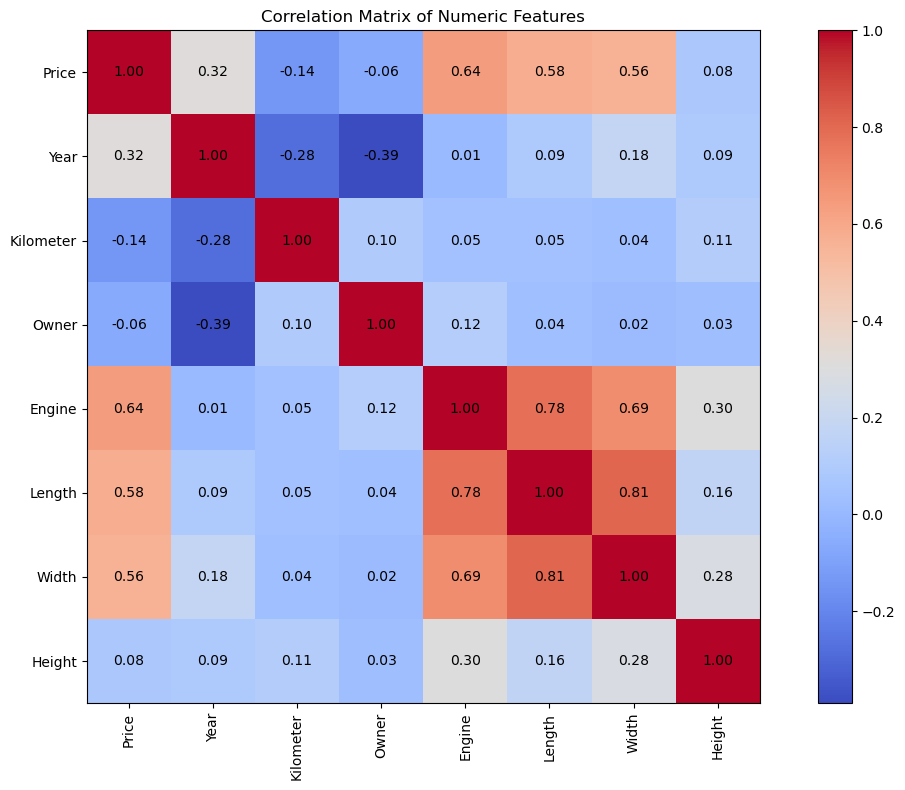

In [52]:
# 1. Plot the correlation matrix
train_data.plot_corr_matrix()

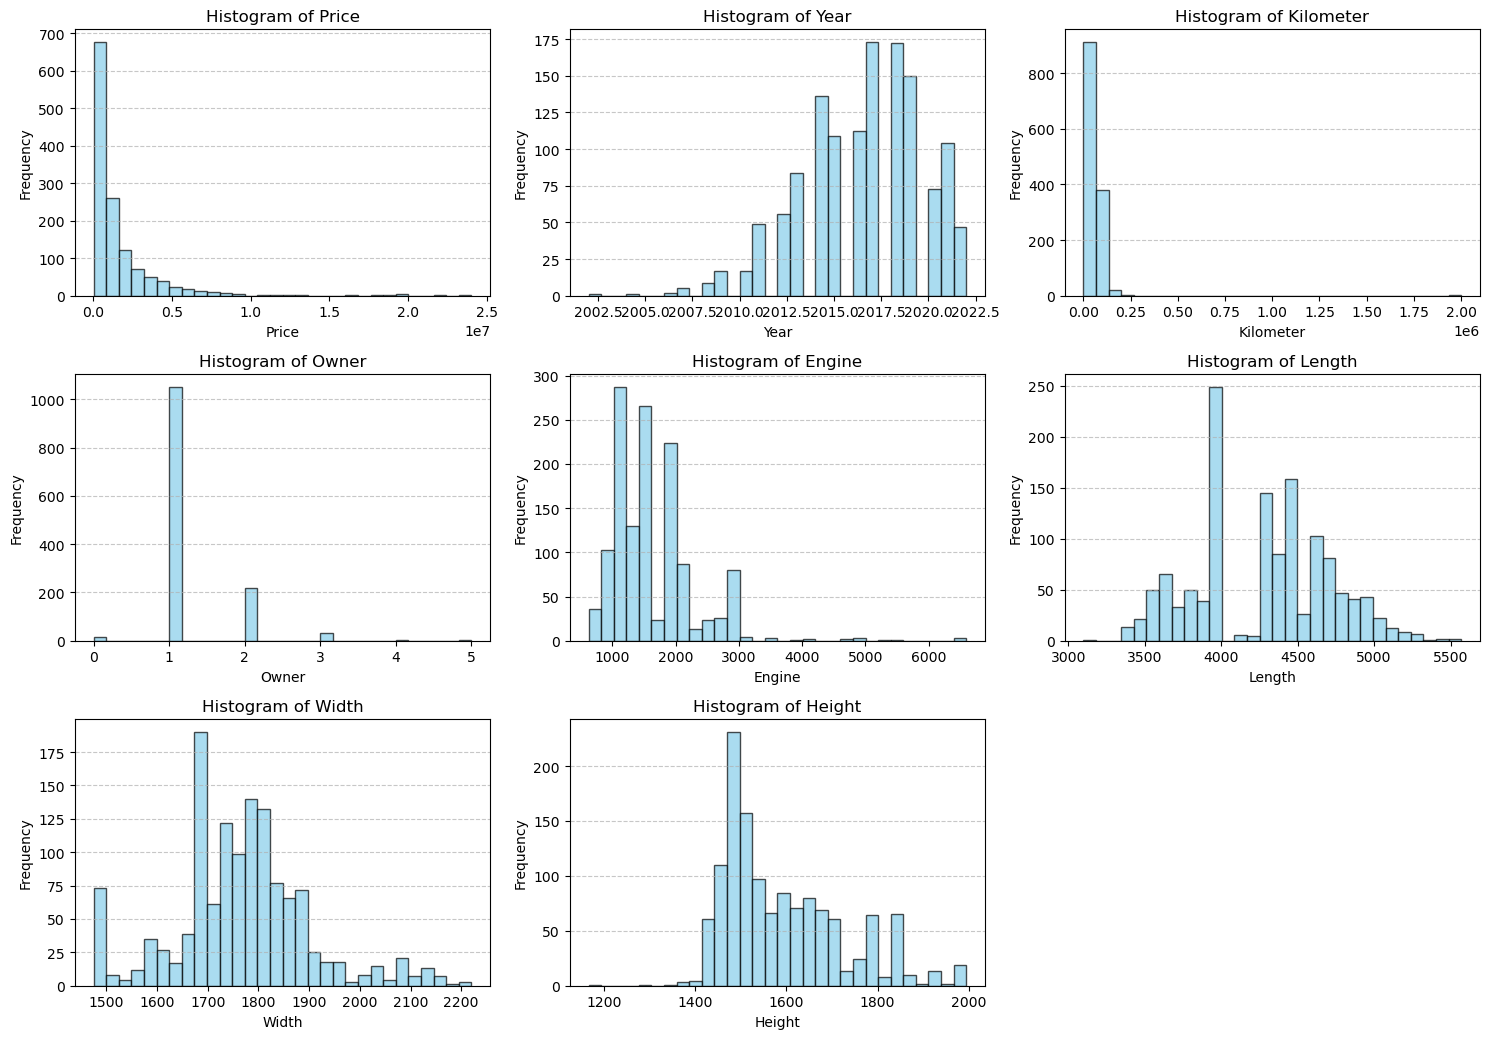

In [53]:
# 2. Plot the distribution of numeric columns
train_data.plot_distribution_of_numeric_columns()

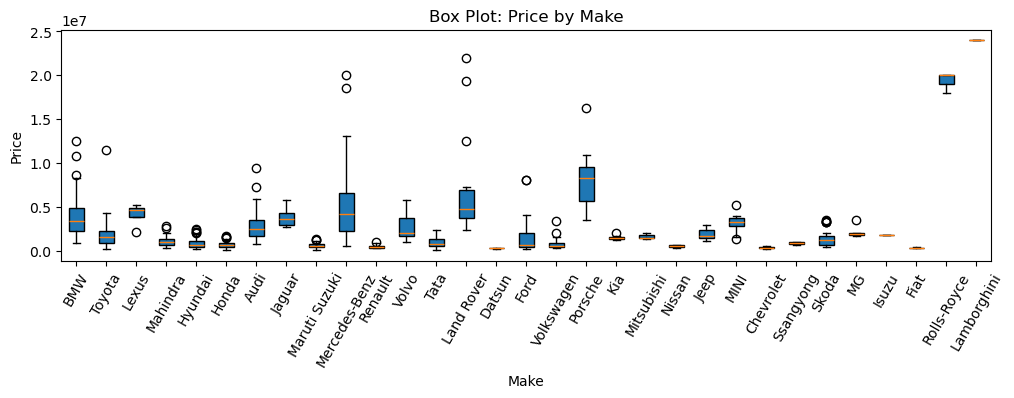

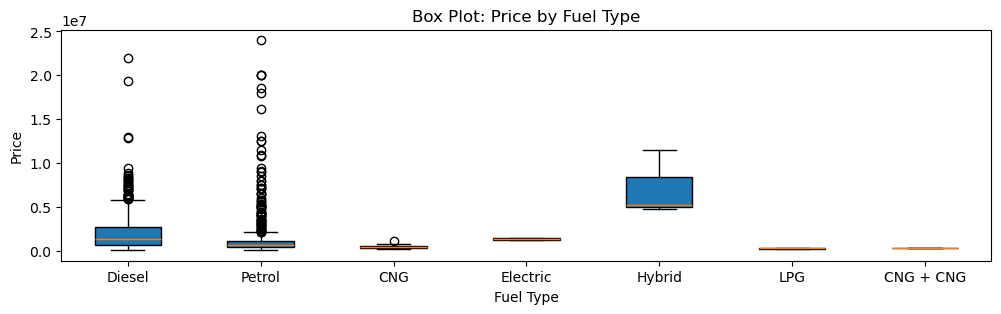

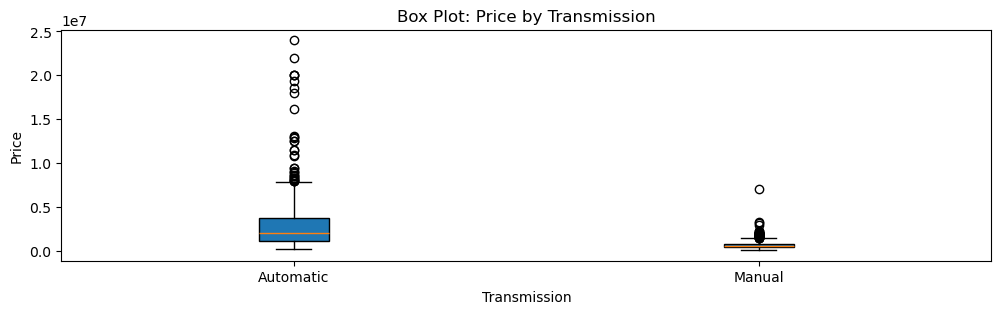

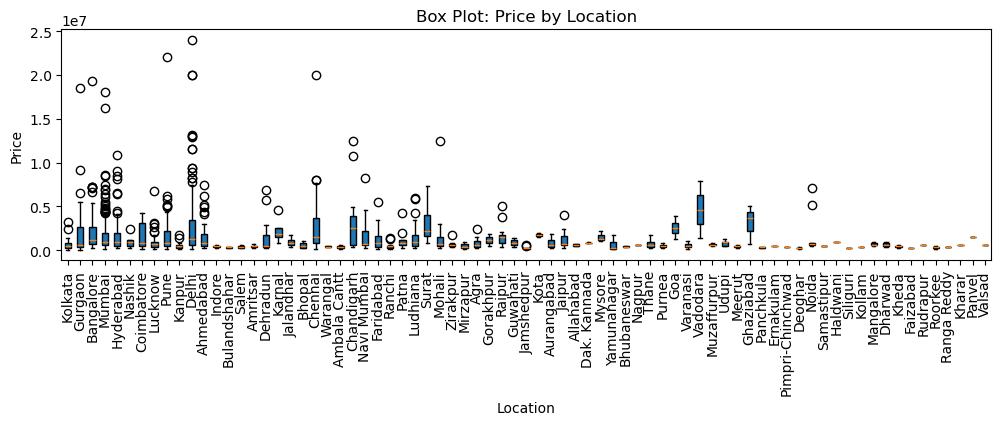

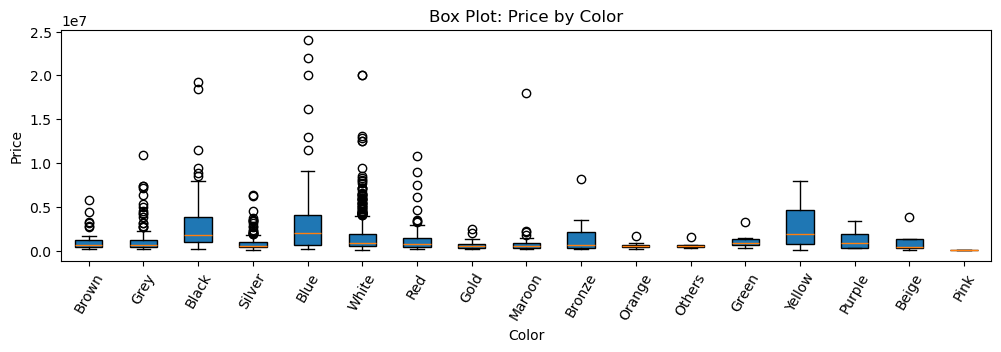

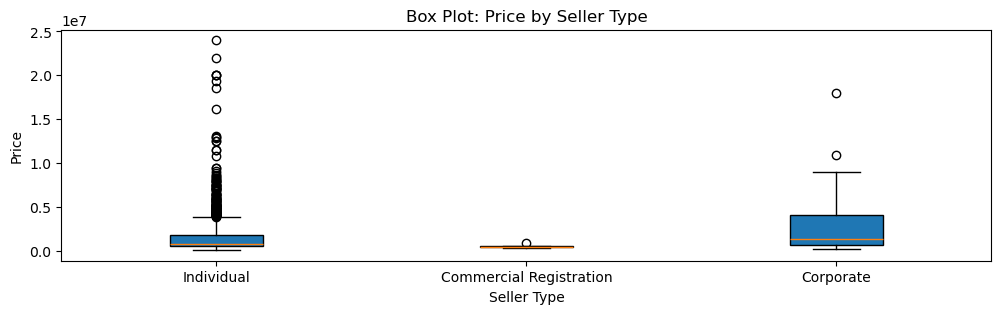

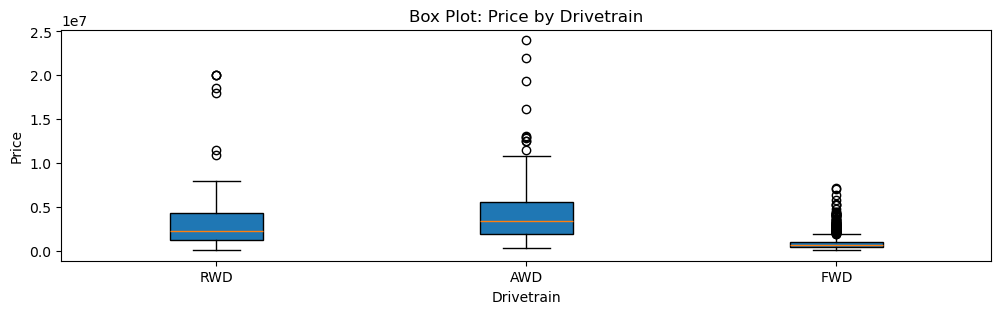

In [54]:
# 3. Box plot: Relationship between Price and Object Columns
train_data.box_plot_for_object_columns()

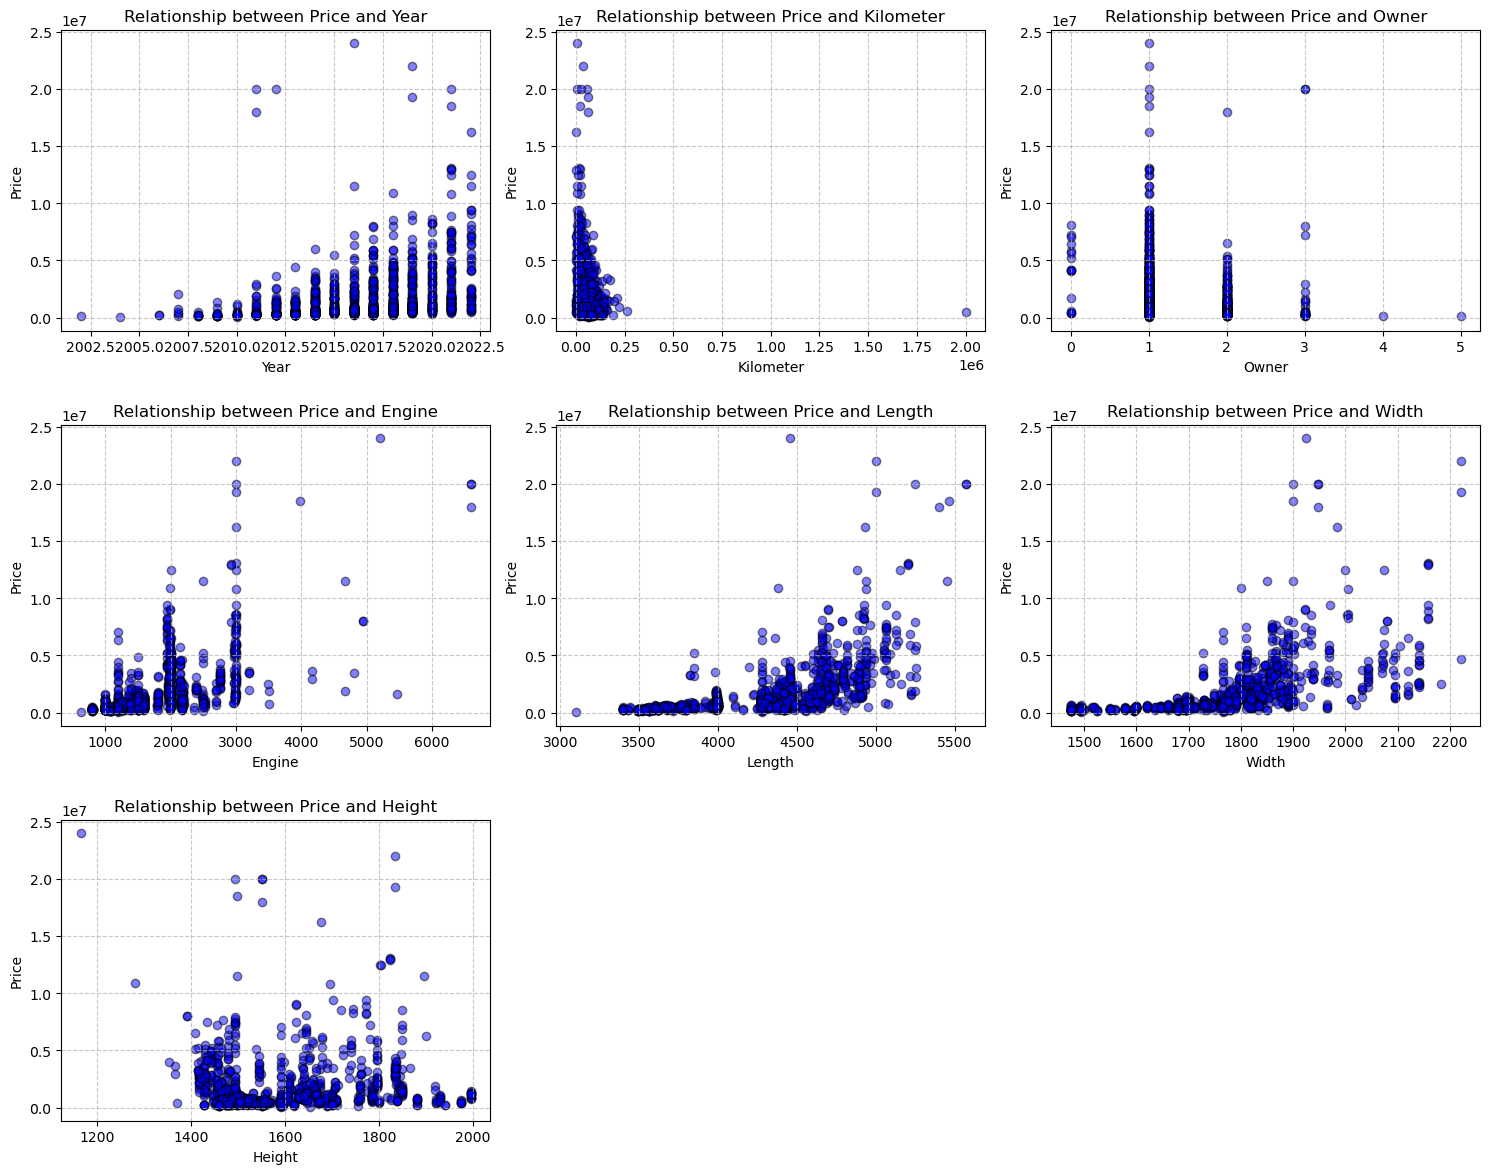

In [56]:
# 3. Scatter Plot: Relationship between Price and Numeric Columns
train_data.scatter_plot_for_numeric_columns()

## Part IV: Data Encoding and Data Normalization

#### IV.1: Data split: Train set and Validation set
We will use train data and validation data (after preprocessing)
- train_data_after_preprocessing
- validation_data_after_preprocessing

#### IV.2: Data Encoding

In [60]:
train_data = copy.deepcopy(train_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = train_data.unique_values()
print()
validation_data = copy.deepcopy(validation_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = validation_data.unique_values()

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 785), ('Fuel Type', 7), ('Transmission', 2), ('Location', 75), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 8
[('Price', 504), ('Year', 19), ('Kilometer', 586), ('Owner', 6), ('Engine', 98), ('Length', 216), ('Width', 150), ('Height', 180)]

Object Columns and number of unique values: 8
[('Make', 23), ('Model', 284), ('Fuel Type', 6), ('Transmission', 2), ('Location', 49), ('Color', 14), ('Seller Type', 2), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 8
[('Price', 232), ('Year', 17), ('Kilometer', 212), ('Owner', 5), ('Engine', 65), ('Length', 124), ('Width', 97), ('Height', 109)]


In [61]:
train_data.encode_data()
train_data.get_column_after_transform_info()
train_data_after_encoding = copy.deepcopy(train_data)

validation_data.encode_data()
validation_data.get_column_after_transform_info()
validation_data_after_encoding = copy.deepcopy(validation_data)

Data encoding completed!

Information about the columns:
Data encoding completed!

Information about the columns:


#### IV.3: Data Normalization

In [64]:
train_data = copy.deepcopy(train_data_after_encoding)
train_data_PCA= train_data #Tao ban sao cho PCA
train_data.data.describe()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,1.317000e+03,1.317000e+03,1.317000e+03,1317.000000,1.317000e+03,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,...,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,1.479659e+06,1.683559e+06,1.688176e+06,2016.436598,5.418505e+04,0.002278,0.446469,0.627942,0.180714,1.204252,...,127.804860,241.184510,1.401670,4276.556568,1766.558846,1591.199696,5.290812,51.927866,4751.312073,2543.649203
std,1.735823e+06,2.390192e+06,2.400416e+06,3.251836,6.241336e+04,0.047691,0.497315,0.483537,0.384927,0.496229,...,66.483634,138.731132,0.699824,440.014789,134.482416,134.238408,0.795895,14.769715,1080.668569,1182.014360
min,2.700000e+05,4.900000e+04,4.900000e+04,2002.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.000000,48.000000,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,2910.000000,1200.000000
25%,5.200000e+05,4.750000e+05,4.800000e+05,2014.000000,2.900000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,...,83.000000,115.000000,1.000000,3990.000000,1695.000000,1485.000000,5.000000,42.000000,4000.000000,1750.000000
50%,6.425000e+05,8.050000e+05,8.230000e+05,2017.000000,5.000000e+04,0.000000,0.000000,1.000000,0.000000,1.000000,...,109.000000,200.000000,1.000000,4315.000000,1766.000000,1550.000000,5.000000,50.000000,4000.000000,1750.000000
75%,1.791000e+06,1.875000e+06,1.850000e+06,2019.000000,7.200000e+04,0.000000,1.000000,1.000000,0.000000,1.000000,...,168.000000,343.000000,2.000000,4600.000000,1831.000000,1670.000000,5.000000,60.000000,6000.000000,4000.000000
max,2.400000e+07,2.400000e+07,2.400000e+07,2022.000000,2.000000e+06,1.000000,1.000000,1.000000,1.000000,5.000000,...,602.000000,780.000000,3.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,8250.000000,6500.000000


In [65]:
train_data.normalize_data()
train_data_after_normalization = copy.deepcopy(train_data)
train_data_after_normalization.data.describe()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 17
[('Make', 31), ('Model', 473), ('Price', 504), ('Year', 19), ('Kilometer', 586), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 98), ('Drivetrain', 3), ('Length', 216), ('Width', 150), ('Height', 180), ('Price Norm', 504)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque,Price Norm
count,1317.000000,1317.000000,1.317000e+03,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,...,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.050976,0.068246,1.688176e+06,0.722695,0.027093,0.002278,0.446469,0.627942,0.180714,0.240850,...,241.184510,0.200835,0.476744,0.391354,0.513494,5.290812,51.927866,4751.312073,2543.649203,13.792564
std,0.073149,0.099795,2.400416e+06,0.162298,0.031207,0.047691,0.497315,0.483537,0.384927,0.099246,...,138.731132,0.349912,0.178144,0.180513,0.161733,0.795895,14.769715,1080.668569,1182.014360,0.980481
min,0.000000,0.000000,4.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,2910.000000,1200.000000,10.799596
25%,0.010535,0.017786,4.800000e+05,0.601191,0.014500,0.000000,0.000000,0.000000,0.000000,0.200000,...,115.000000,0.000000,0.360729,0.295302,0.385542,5.000000,42.000000,4000.000000,1750.000000,13.081543
50%,0.015697,0.031564,8.230000e+05,0.750930,0.025000,0.000000,0.000000,1.000000,0.000000,0.200000,...,200.000000,0.000000,0.492308,0.390604,0.463855,5.000000,50.000000,4000.000000,1750.000000,13.620713
75%,0.064096,0.076239,1.850000e+06,0.850632,0.036000,0.000000,1.000000,1.000000,0.000000,0.200000,...,343.000000,0.500000,0.607692,0.477852,0.608434,5.000000,60.000000,6000.000000,4000.000000,14.430697
max,1.000000,1.000000,2.400000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,780.000000,1.000000,1.000000,1.000000,1.000000,8.000000,105.000000,8250.000000,6500.000000,16.993564


In [67]:
validation_data = copy.deepcopy(validation_data_after_encoding)
validation_data_PCA = validation_data #Tạo bản sao cho validation co PCA
validation_data.data.describe()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,3.300000e+02,3.300000e+02,3.300000e+02,330.000000,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,1.497409e+06,1.717321e+06,1.730494e+06,2016.351515,54291.412121,0.0,0.478788,0.639394,0.142424,1.275758,...,129.972727,255.809091,1.496970,4300.912121,1771.545455,1597.248485,5.339394,52.787879,4783.230303,2442.793939
std,1.280127e+06,2.171674e+06,2.197913e+06,3.811367,39210.945109,0.0,0.500308,0.480906,0.350015,0.539915,...,57.255009,142.825217,0.764916,445.205435,136.549398,134.092714,0.839720,15.782830,1066.983169,1130.969883
min,3.325000e+05,1.149990e+05,1.149990e+05,1988.000000,600.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,46.000000,69.000000,1.000000,3395.000000,1475.000000,1297.000000,2.000000,27.000000,2910.000000,1200.000000
25%,5.000000e+05,4.675000e+05,4.762500e+05,2014.000000,28250.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,82.000000,115.000000,1.000000,3987.750000,1695.000000,1494.000000,5.000000,42.000000,3800.000000,1600.000000
50%,1.050000e+06,9.500000e+05,9.630000e+05,2017.000000,48579.500000,0.0,0.000000,1.000000,0.000000,1.000000,...,118.000000,235.000000,1.000000,4375.000000,1777.000000,1555.000000,5.000000,50.000000,4200.000000,1750.000000
75%,2.400000e+06,2.280625e+06,2.337500e+06,2019.000000,71667.250000,0.0,1.000000,1.000000,0.000000,1.000000,...,174.000000,360.000000,2.000000,4633.000000,1838.000000,1688.750000,5.000000,62.250000,6000.000000,3687.500000
max,5.900000e+06,2.750000e+07,2.750000e+07,2022.000000,440000.000000,0.0,1.000000,1.000000,1.000000,4.000000,...,335.000000,620.000000,3.000000,5265.000000,2220.000000,1995.000000,8.000000,105.000000,6600.000000,4800.000000


In [68]:
validation_data.normalize_data()
validation_data_after_normalization = copy.deepcopy(validation_data)
validation_data_after_normalization.data.describe()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 17
[('Make', 23), ('Model', 214), ('Price', 232), ('Year', 17), ('Kilometer', 212), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 5), ('Seller Type', 2), ('Engine', 65), ('Drivetrain', 3), ('Length', 124), ('Width', 97), ('Height', 109), ('Price Norm', 232)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque,Price Norm
count,330.000000,330.000000,3.300000e+02,330.000000,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.209234,0.058511,1.730494e+06,0.834932,0.122193,0.0,0.478788,0.639394,0.142424,0.318939,...,255.809091,0.248485,0.484445,0.398048,0.430155,5.339394,52.787879,4783.230303,2442.793939,13.864019
std,0.229928,0.079302,2.197913e+06,0.111665,0.089237,0.0,0.500308,0.480906,0.350015,0.134979,...,142.825217,0.382458,0.238078,0.183288,0.192110,0.839720,15.782830,1066.983169,1130.969883,0.994406
min,0.000000,0.000000,1.149990e+05,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,69.000000,0.000000,0.000000,0.000000,0.000000,2.000000,27.000000,2910.000000,1200.000000,11.652687
25%,0.030085,0.012872,4.762500e+05,0.766226,0.062927,0.0,0.000000,0.000000,0.000000,0.250000,...,115.000000,0.000000,0.316979,0.295302,0.282235,5.000000,42.000000,3800.000000,1600.000000,13.073690
50%,0.128873,0.030491,9.630000e+05,0.854000,0.109193,0.0,0.000000,1.000000,0.000000,0.250000,...,235.000000,0.000000,0.524064,0.405369,0.369628,5.000000,50.000000,4200.000000,1750.000000,13.777732
75%,0.371352,0.079081,2.337500e+06,0.912443,0.161737,0.0,1.000000,1.000000,0.000000,0.250000,...,360.000000,0.500000,0.662032,0.487248,0.561246,5.000000,62.250000,6000.000000,3687.500000,14.664550
max,1.000000,1.000000,2.750000e+07,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,620.000000,1.000000,1.000000,1.000000,1.000000,8.000000,105.000000,6600.000000,4800.000000,17.129697


In [69]:
validation_data_PCA

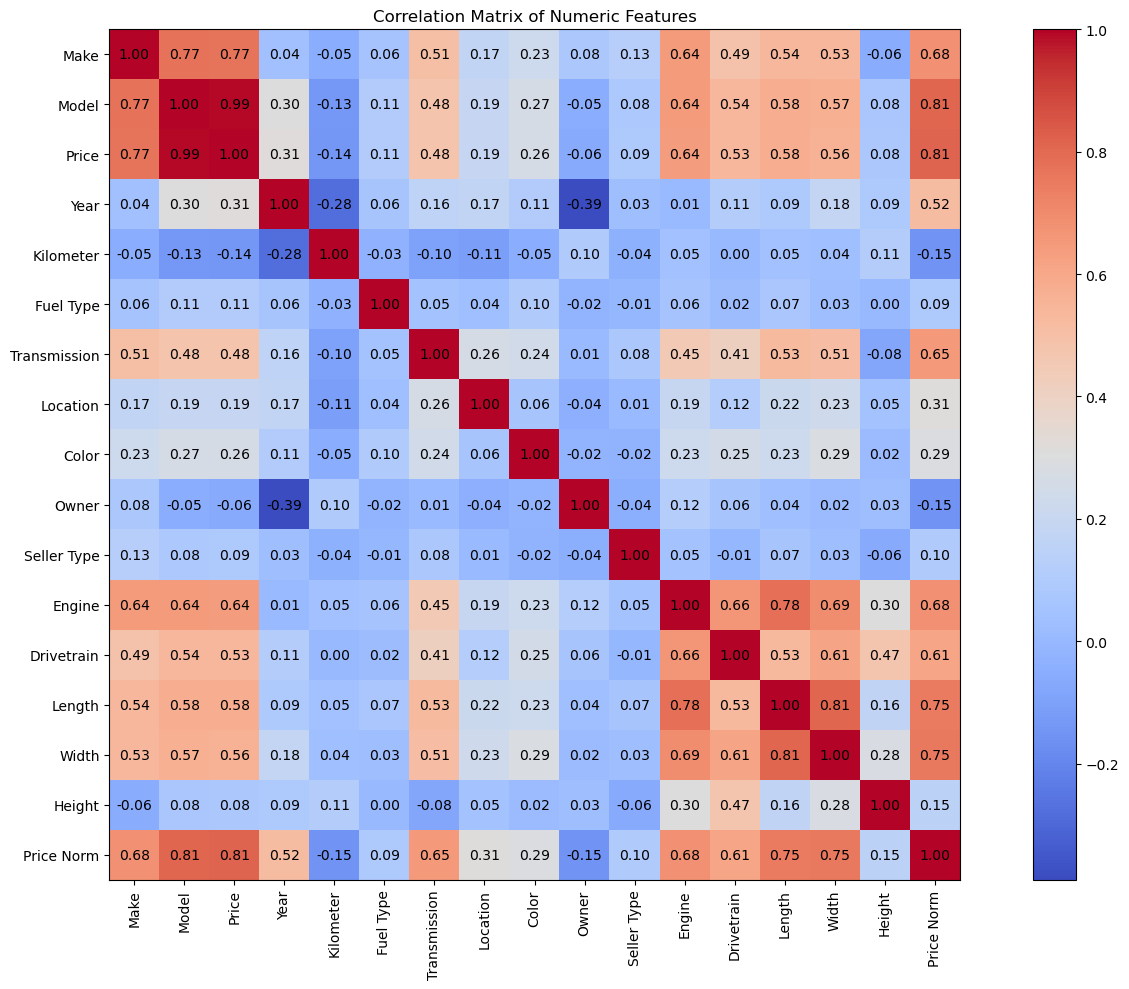

In [70]:
train_data_after_normalization.plot_corr_matrix(15, 10)

## Part V: Split dataset and tools to evaluate models

#### V.1: Split dataset

In [73]:
train_data = copy.deepcopy(train_data_after_normalization)
validation_data = copy.deepcopy(validation_data_after_normalization)
numeric_columns, object_columns = train_data.numeric_columns, train_data.object_columns
print(numeric_columns, len(numeric_columns))

train_data = train_data.data
validation_data = validation_data.data

# X_train, y_train from train_data
# X_val, y_val from validation_data

X_train = train_data.drop(columns=['Price', 'Price Norm'])
y_train = train_data['Price']

X_val = validation_data.drop(columns=['Price'])
y_val = validation_data['Price']

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Drivetrain', 'Length', 'Width', 'Height', 'Price Norm'],
      dtype='object') 17


In [74]:
print(X_train)

          Make     Model      Year  Kilometer  Fuel Type  Transmission  \
0     0.131901  0.074673  0.601191   0.017500        0.0           1.0   
1     0.052044  0.131560  0.750930   0.032500        0.0           1.0   
2     0.181943  0.180619  0.750930   0.015529        0.0           1.0   
3     0.028024  0.075195  1.000000   0.005500        0.0           1.0   
4     0.015697  0.016429  0.800793   0.028000        0.0           0.0   
...        ...       ...       ...        ...        ...           ...   
1312  0.089760  0.171266  1.000000   0.011000        0.0           1.0   
1313  0.010535  0.008079  0.501242   0.018500        0.0           0.0   
1314  0.017067  0.007975  0.551229   0.036500        0.0           0.0   
1315  0.017067  0.331761  0.800793   0.011500        0.0           1.0   
1316  0.017067  0.007557  0.601191   0.041000        0.0           0.0   

      Location  Color  Owner  Seller Type  ...  Max Power  Max Torque  \
0          0.0    0.0    0.2          

#### V.2: Tools to evaluate the models

In [77]:
# Function to evaluate the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (SSE / SST) # R^2 = 1 - SSE/SST = SSR/SST

def evaluate_model(y_true, y_pred):
    model_eval = pd.DataFrame({
        'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
        'Value': [mse(y_true, y_pred), rmse(y_true, y_pred), mae(y_true, y_pred), r2_score(y_true, y_pred)]
    })

    return model_eval

## Part VI: Linear Regression models

#### VI.1: Simple Linear Regression model from Statistics's point of view
Based on Correlation coefficient map, **Model** maybe the best feature for model. We will prove it.

In [88]:
# Y = beta0 + beta1*X
# beta1 = Sxx / Sxy
# beta0 = mean(Y) - beta1 * mean(X)
# Sxx = sum((X - mean(X))^2)
# Sxy = sum((X - mean(X)) * (Y - mean(Y)))

def simple_linear_regression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

result = []

for F in numeric_columns.drop(['Price', 'Price Norm']):
    # Predict the price of a car based on feature F
    beta0, beta1 = simple_linear_regression(X_train[F], y_train)
    # print(f"{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

    # Predict the price of a car based on feature F
    y_pred = beta0 + beta1 * X_train[F]

    # Evaluate the model on train set
    model_eval = evaluate_model(y_train, y_pred)
    result.append([F, model_eval, beta0, beta1])

Metric = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for i, metric in enumerate(Metric):
    best = result[0]
    for res in result:
        if (res[1].iloc[i, 1] < best[1].iloc[i, 1] and metric != 'R^2 Score') or \
           (res[1].iloc[i, 1] > best[1].iloc[i, 1] and metric == 'R^2 Score'):
            best = res
    print(f"Best feature for {metric}: {best[0]}. Value: {best[1].iloc[i, 1]}")

print(f"\nConclusion: {best[0]} is the best feature for all metrics")
# => Max Power (best[0]) is the best feature for all metrics 
id_BestFeature_in_result = [i for i in range(len(result)) if result[i][0] == best[0]][0]

beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]
F = result[id_BestFeature_in_result][0]
print(f"\n{F} formula: Price = {beta0:.2f} + {beta1:.2f} * {F}")

print("\nEvaluation metrics on Training Set:")
result[id_BestFeature_in_result][1]

Best feature for Mean Squared Error: Model. Value: 64007121845.31502
Best feature for Root Mean Squared Error: Model. Value: 252996.28820461975
Best feature for Mean Absolute Error: Model. Value: 96940.22074884153
Best feature for R^2 Score: Model. Value: 0.9888830662207408

Conclusion: Model is the best feature for all metrics

Model formula: Price = 55775.56 + 23919375.57 * Model

Evaluation metrics on Training Set:


,Metric,Value
0,Mean Squared Error,6.400712e+10
1,Root Mean Squared Error,2.529963e+05
2,Mean Absolute Error,9.694022e+04
3,R^2 Score,9.888831e-01


In [89]:
# Best model on training set:
print(f'Best feature: {result[id_BestFeature_in_result][0]}')
beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]

# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_train[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df.head(10)

Best feature: Model


,Actual,Predicted
0,1400000,1841914
1,2690000,3202615
2,4375000,4376064
3,1825000,1854398
4,550000,448755
5,499000,381345
6,2400000,2753209
7,178000,184605
8,3125000,3127714
9,5800000,5799182


In [94]:
print("\nEvaluation metrics on Validation Set:")
y_pred = beta0 + beta1 * X_val['Model']

model_eval = evaluate_model(y_val, y_pred)
model_eval


Evaluation metrics on Validation Set:


,Metric,Value
0,Mean Squared Error,2.262509e+11
1,Root Mean Squared Error,4.756584e+05
2,Mean Absolute Error,2.837493e+05
3,R^2 Score,9.530228e-01


In [98]:
# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_val[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,910000,750168
1,299000,216491
2,885000,728331
3,484999,378951
4,3550000,2881381
5,4000000,2793599
6,335000,265404
7,5200000,4497260
8,1275000,1068976
9,2750000,2356875


#### VI.2: Multiple Linear Regression model

#### VI.3: Polynomial Regression model

#### VI.4: Linear Regression model with PCA

Copy lấy từ train_data_PCA,validation_data_PCA 

#Xử lý PCA  với train_pata_PCA
Bước 1: Chuyển về dạng Data Frame

In [105]:

if not isinstance(train_data_PCA, pd.DataFrame):
    if hasattr(train_data_PCA, "to_dataframe"):
        train_data_after_normalization_copy = train_data_PCA.to_dataframe()
    elif hasattr(train_data_PCA ,"data"):
        train_data_after_normalization_copy = pd.DataFrame(train_data_PCA.data)
    else:
        raise TypeError("train_data_after_normalization không phải DataFrame và không có phương thức phù hợp để chuyển đổi.")




In ra Ma Trận tương quan 

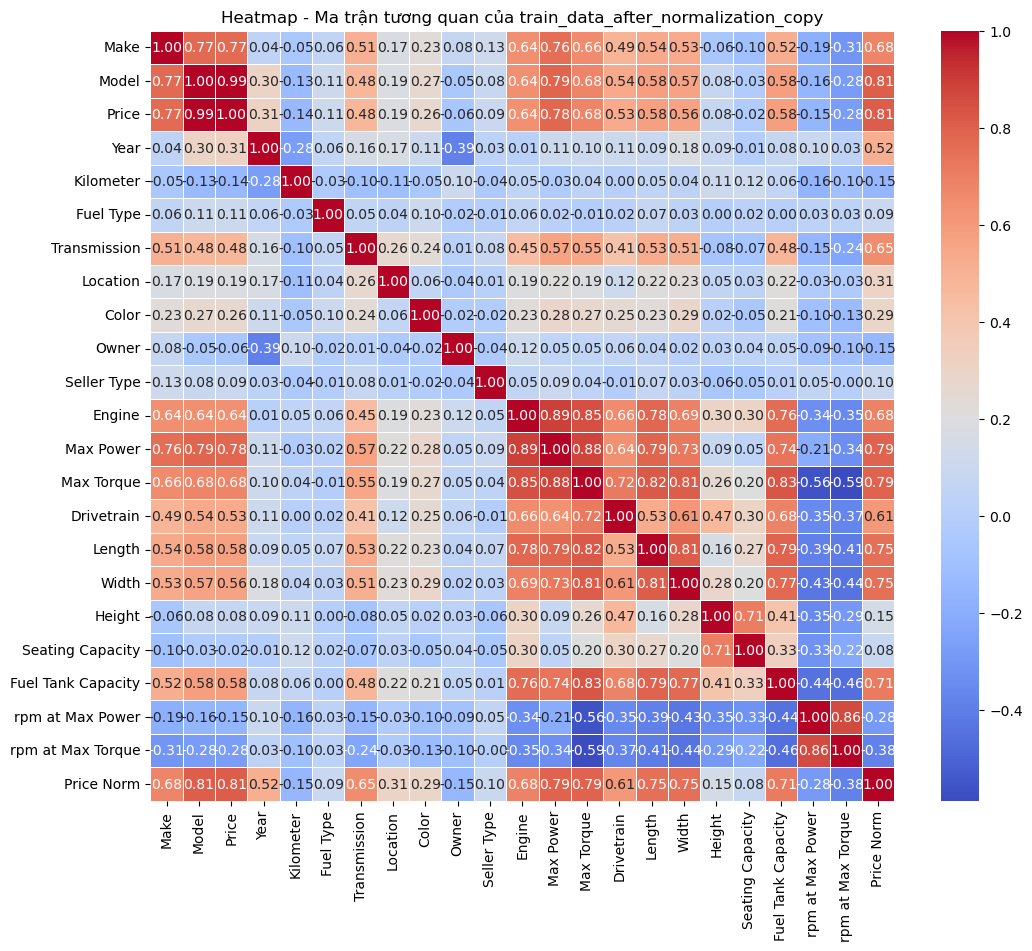

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
correlation_matrix = train_data_after_normalization_copy.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))  # Điều chỉnh kích thước đồ thị
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Tiêu đề
plt.title("Heatmap - Ma trận tương quan của train_data_after_normalization_copy")
plt.show()

Nhận xét: 
Từ ma trận heatmap (Ma trận tương quan) ta thấy nhưng bộ tương quan sau có thể giảm số chiều về 1
['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']
['Engine', 'Max Power', 'Max Torque', 'Drivetrain']
['rpm at Max Power', 'rpm at Max Torque']

In [110]:
def pca(X, num_components):
 
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    principal_components = eigenvectors_sorted[:, :num_components]
    X_pca = np.dot(X_meaned, principal_components)
    return X_pca

In [111]:

# Chọn các cột để áp dụng PCA
num_components = 1
#Bước 1: PCA nhung bo du lieu can
##########################################
columns_to_pca = ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']
for col in columns_to_pca:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input = train_data_after_normalization_copy[columns_to_pca].values
X_pca_transformed = pca(X_pca_input, num_components)
##########################################
columns_to_pca1 = ['Engine', 'Max Power', 'Max Torque', 'Drivetrain']
for col in columns_to_pca1:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input1 = train_data_after_normalization_copy[columns_to_pca1].values
X_pca_transformed1 = pca(X_pca_input1, num_components)
##########################################
columns_to_pca2 = ['rpm at Max Power', 'rpm at Max Torque']
for col in columns_to_pca2:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input2 = train_data_after_normalization_copy[columns_to_pca2].values
X_pca_transformed2 = pca(X_pca_input2, num_components)
##########################################

train_data_after_normalization1 = train_data_after_normalization_copy.copy()
#Bước 2: Xoa tren du lieu cu
train_data_after_normalization1.drop(columns=columns_to_pca, inplace=True)
train_data_after_normalization1.drop(columns=columns_to_pca1, inplace=True)
train_data_after_normalization1.drop(columns=columns_to_pca2, inplace=True)
pca_columns1 = [f'PCA_hs_{i+1}' for i in range(num_components)]
pca_df1 = pd.DataFrame(X_pca_transformed, columns=pca_columns1)

# Bước 4: PCA trên nhóm 'cs'
pca_columns2 = [f'PCA_cs_{i+1}' for i in range(num_components)]
pca_df2 = pd.DataFrame(X_pca_transformed1, columns=pca_columns2)

# Bước 5: PCA trên nhóm 'kt'
pca_columns3 = [f'PCA_kt_{i+1}' for i in range(num_components)]
pca_df3 = pd.DataFrame(X_pca_transformed2, columns=pca_columns3)

# Bước 6: Gán dữ liệu PCA vào train_data_after_normalization1
train_data_after_normalization1 = pd.concat([train_data_after_normalization1, pca_df1, pca_df2, pca_df3], axis=1)


In [112]:
train_data_after_normalization1 

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price Norm,PCA_hs_1,PCA_cs_1,PCA_kt_1
0,0.131901,0.074673,1400000,0.601191,0.017500,0.0,1.0,0.0,0.0,0.2,0.0,14.151984,-8.068626,149.693397,-1092.532343
1,0.052044,0.131560,2690000,0.750930,0.032500,0.0,1.0,0.0,0.0,0.2,0.0,14.805052,-28.099906,209.749336,-1605.611823
2,0.181943,0.180619,4375000,0.750930,0.015529,0.0,1.0,1.0,0.0,0.2,0.0,15.291417,-13.065890,4.061926,2088.421683
3,0.028024,0.075195,1825000,1.000000,0.005500,0.0,1.0,1.0,1.0,0.2,0.0,14.417091,-5.048564,54.726134,-1371.318695
4,0.015697,0.016429,550000,0.800793,0.028000,0.0,0.0,1.0,0.0,0.2,0.0,13.217675,8.934466,-135.266531,1917.797303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,0.089760,0.171266,4150000,1.000000,0.011000,0.0,1.0,1.0,0.0,0.2,0.0,15.238619,-2.068421,96.376912,-1181.518792
1313,0.010535,0.008079,235000,0.501242,0.018500,0.0,0.0,1.0,0.0,0.4,0.0,12.367345,16.934369,-162.469045,-1092.532343
1314,0.017067,0.007975,240000,0.551229,0.036500,0.0,0.0,0.0,0.0,0.2,0.0,12.388398,6.935121,-150.678945,2085.149538
1315,0.017067,0.331761,7990000,0.800793,0.011500,0.0,1.0,1.0,1.0,0.2,0.0,15.893701,-8.051722,358.602380,2438.225302


In [113]:
# xu ly tuong tu tren val
if not isinstance(validation_data_PCA , pd.DataFrame):
    if hasattr(validation_data_PCA , "to_dataframe"):
        val_data_after_normalization_copy = validation_data_PCA.to_dataframe()
     
    elif hasattr(validation_data_PCA  ,"data"):
        val_data_after_normalization_copy = pd.DataFrame(validation_data_PCA.data)
    else:
        raise TypeError("val_data_after_normalization_copy không phải DataFrame và không có phương thức phù hợp để chuyển đổi.")
val_data_after_normalization_copy


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque,Price Norm
0,0.029636,0.029031,910000,0.912443,0.076013,0.0,0.0,1.0,1.0,0.25,...,138,0.0,0.585561,0.342282,0.269341,5,43,6000,4400,13.721201
1,0.044814,0.006719,299000,0.678322,0.066909,0.0,0.0,0.0,1.0,0.75,...,115,0.0,0.483957,0.397315,0.429799,5,52,6000,4000,12.608202
2,0.199371,0.028118,885000,0.883229,0.085116,0.0,0.0,1.0,0.0,0.25,...,153,0.0,0.544385,0.300671,0.242120,5,55,5200,3750,13.693344
3,0.044814,0.013511,484999,0.736939,0.196632,0.0,0.0,1.0,0.0,0.25,...,260,0.0,0.558824,0.340940,0.255014,5,45,4000,1500,13.091904
4,0.227661,0.118130,3550000,0.941643,0.123805,0.0,1.0,1.0,1.0,0.25,...,450,0.5,0.748663,0.510067,0.770774,7,80,3400,1600,15.082458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.227661,0.059704,1750000,0.736939,0.214838,0.0,0.0,1.0,0.0,0.50,...,343,1.0,0.700535,0.489933,0.792264,7,80,3600,1400,14.375127
326,0.031881,0.007668,325000,0.678322,0.201183,0.0,1.0,1.0,0.0,0.50,...,146,0.0,0.548128,0.295302,0.262178,5,42,6000,1750,12.691584
327,0.016973,0.032317,1000000,1.000000,0.007738,0.0,1.0,0.0,0.0,0.50,...,96,0.0,0.318717,0.369128,0.441261,5,40,6250,3500,13.815512
328,0.030085,0.009494,375000,0.736939,0.087392,0.0,0.0,1.0,0.0,0.25,...,110,0.0,0.307487,0.277852,0.223496,5,45,5400,3750,12.834684


In [114]:
num_components = 1
columns_to_pca = ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']
columns_to_pca1 = ['Engine', 'Max Power', 'Max Torque', 'Drivetrain']
columns_to_pca2 = ['rpm at Max Power', 'rpm at Max Torque']

val_data_after_normalization1 = val_data_after_normalization_copy.drop(columns=columns_to_pca + columns_to_pca1 + columns_to_pca2)
print(val_data_after_normalization1)
val_data_after_normalization1 = pd.concat([train_data_after_normalization1, pca_df1, pca_df2, pca_df3], axis=1)

X_val_pca1 = pca(val_data_after_normalization_copy[columns_to_pca].values, num_components)
X_val_pca2 = pca(val_data_after_normalization_copy[columns_to_pca1].values, num_components)
X_val_pca3 = pca(val_data_after_normalization_copy[columns_to_pca2].values, num_components)

pca_val_df1 = pd.DataFrame(X_val_pca1, columns=pca_columns1)
pca_val_df2 = pd.DataFrame(X_val_pca2, columns=pca_columns2)
pca_val_df3 = pd.DataFrame(X_val_pca3, columns=pca_columns3)

val_data_after_normalization1 = val_data_after_normalization_copy.drop(columns=columns_to_pca + columns_to_pca1 + columns_to_pca2)
val_data_after_normalization1 = pd.concat([val_data_after_normalization1, pca_val_df1, pca_val_df2, pca_val_df3], axis=1)






         Make     Model    Price      Year  Kilometer  Fuel Type  \
0    0.029636  0.029031   910000  0.912443   0.076013        0.0   
1    0.044814  0.006719   299000  0.678322   0.066909        0.0   
2    0.199371  0.028118   885000  0.883229   0.085116        0.0   
3    0.044814  0.013511   484999  0.736939   0.196632        0.0   
4    0.227661  0.118130  3550000  0.941643   0.123805        0.0   
..        ...       ...      ...       ...        ...        ...   
325  0.227661  0.059704  1750000  0.736939   0.214838        0.0   
326  0.031881  0.007668   325000  0.678322   0.201183        0.0   
327  0.016973  0.032317  1000000  1.000000   0.007738        0.0   
328  0.030085  0.009494   375000  0.736939   0.087392        0.0   
329  0.029636  0.009129   365000  0.619646   0.317251        0.0   

     Transmission  Location  Color  Owner  Seller Type  Price Norm  
0             0.0       1.0    1.0   0.25          0.0   13.721201  
1             0.0       0.0    1.0   0.75    

In [148]:
## Do mot so li do t chuyen thanh (n,1)

train_data_v2 = copy.deepcopy(train_data_after_normalization1)
validation_data_v2 = copy.deepcopy(val_data_after_normalization1)

# Lấy danh sách các cột số cần chuẩn hóa
numeric_features = ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
                    'Location', 'Color', 'Owner', 'Seller Type', 'PCA_hs_1', 'PCA_cs_1', 'PCA_kt_1']

for col in numeric_features:
    mean = train_data_v2[col].mean()
    std = train_data_v2[col].std()
    
    if std == 0:
        std = 1

    train_data_v2[col] = (train_data_v2[col] - mean) / std
    validation_data_v2[col] = (validation_data_v2[col] - mean) / std

# Xác định X_train, y_train từ tập train_data_v2
X_train_v2 = train_data_v2.drop(columns=['Price', 'Price Norm'])
y_train_v2 = train_data_v2['Price']

# Xác định X_val, y_val từ tập validation_data_v2
X_val_v2 = validation_data_v2.drop(columns=['Price'])
y_val_v2 = validation_data_v2['Price']

print("Shape of validation_data_v2 after scaling:", validation_data_v2.shape)
print("Shape of validation_data_v2 after scaling:", train_data_v2.shape)



Shape of validation_data_v2 after scaling: (330, 15)
Shape of validation_data_v2 after scaling: (1317, 15)


Thử với của Tài 

In [151]:


# Hàm hồi quy tuyến tính đơn giản
def simple_linear_regression_v2(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

# Danh sách đặc trưng số để thử nghiệm
result_v2 = []
numeric_columns_v2 = ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
                      'Location', 'Color', 'Owner', 'Seller Type', 'PCA_hs_1', 'PCA_cs_1',
                      'PCA_kt_1']

# Duyệt qua từng đặc trưng và thực hiện hồi quy tuyến tính đơn giản
for feature_v2 in numeric_columns_v2:
    # Dự đoán giá dựa trên từng đặc trưng
    beta0_v2, beta1_v2 = simple_linear_regression_v2(X_train_v2[feature_v2], y_train_v2)

    # Dự đoán giá trị y dựa trên feature_v2
    y_pred_v2 = beta0_v2 + beta1_v2 * X_train_v2[feature_v2]

    # Đánh giá mô hình
    model_eval_v2 = evaluate_model(y_train_v2, y_pred_v2)
    result_v2.append([feature_v2, model_eval_v2, beta0_v2, beta1_v2])

# Danh sách các metric đánh giá
Metric_v2 = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

# Tìm đặc trưng tốt nhất cho từng metric
for i, metric_v2 in enumerate(Metric_v2):
    best_v2 = result_v2[0]
    for res_v2 in result_v2:
        if (res_v2[1].iloc[i, 1] < best_v2[1].iloc[i, 1] and metric_v2 != 'R^2 Score') or \
           (res_v2[1].iloc[i, 1] > best_v2[1].iloc[i, 1] and metric_v2 == 'R^2 Score'):
            best_v2 = res_v2
    print(f"Best feature for {metric_v2}: {best_v2[0]}. Value: {best_v2[1].iloc[i, 1]}")

# Kết luận về đặc trưng tốt nhất
print(f"\nConclusion: {best_v2[0]} is the best feature for all metrics")

# Xác định chỉ số của đặc trưng tốt nhất
id_BestFeature_in_result_v2 = [i for i in range(len(result_v2)) if result_v2[i][0] == best_v2[0]][0]

# Lấy giá trị beta tương ứng
beta0_v2 = result_v2[id_BestFeature_in_result_v2][2]
beta1_v2 = result_v2[id_BestFeature_in_result_v2][3]
F_v2 = result_v2[id_BestFeature_in_result_v2][0]

# Công thức hồi quy tuyến tính tốt nhất
print(f"\n{F_v2} formula: Price = {beta0_v2:.2f} + {beta1_v2:.2f} * {F_v2}")

# Hiển thị kết quả đánh giá trên tập huấn luyện
print("\nEvaluation metrics on Training Set:")
result_v2[id_BestFeature_in_result_v2][1]


Best feature for Mean Squared Error: Model. Value: 64007121845.31502
Best feature for Root Mean Squared Error: Model. Value: 252996.28820461975
Best feature for Mean Absolute Error: Model. Value: 96940.22074884143
Best feature for R^2 Score: Model. Value: 0.9888830662207408

Conclusion: Model is the best feature for all metrics

Model formula: Price = 1688176.11 + 2387036.46 * Model

Evaluation metrics on Training Set:


,Metric,Value
0,Mean Squared Error,6.400712e+10
1,Root Mean Squared Error,2.529963e+05
2,Mean Absolute Error,9.694022e+04
3,R^2 Score,9.888831e-01


In [153]:
y_train_v2 = y_train_v2.values.reshape(-1,1)
y_val_v2 = y_val_v2.values.reshape(-1,1)
X_val_v2 = X_val_v2.drop(columns=['Price Norm'])

Epoch 10, loss: 1279665133272.6985
Epoch 20, loss: 533636235919.9901
Epoch 30, loss: 323297915160.9930
Epoch 40, loss: 234322089885.2643
Epoch 50, loss: 186533433415.3031
Epoch 60, loss: 154508431116.1045
Epoch 70, loss: 131531929373.9177
Epoch 80, loss: 114340460434.7563
Epoch 90, loss: 101539007156.2590
Epoch 100, loss: 91208910375.6187
Epoch 110, loss: 84018501579.5999
Epoch 120, loss: 78552554691.7541
Epoch 130, loss: 74472855847.4660
Epoch 140, loss: 71320002314.6185
Epoch 150, loss: 68924977038.9137
Epoch 160, loss: 67095888426.7785
Epoch 170, loss: 65697937465.4196
Epoch 180, loss: 64625229725.4211
Epoch 190, loss: 63795161345.2981
Epoch 200, loss: 63204256488.8128
Best model found with loss = 63204256488.8128
Test Loss: 134194895568.9456
Mean Absolute Error (MAE): 187426.6790
Mean Squared Error (MSE): 134194895568.9456
Root Mean Squared Error (RMSE): 366326.2147
Mean Absolute Percentage Error (MAPE): 19.8791%
R2 Score: 0.9721

Final Weights:
[ 8.52025375e+04  2.26282585e+06  6.

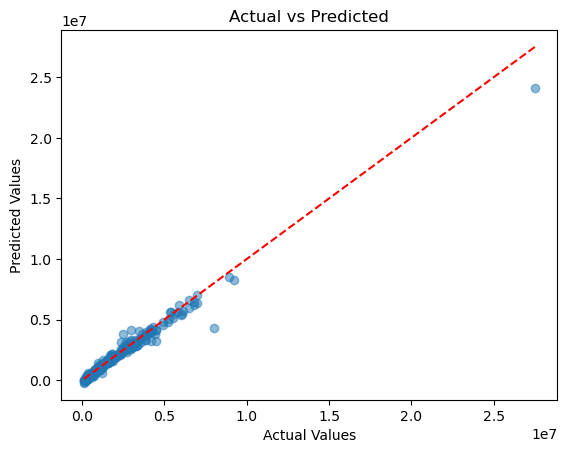

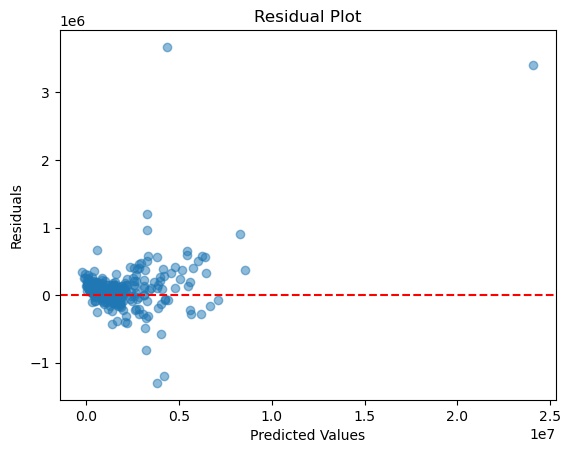

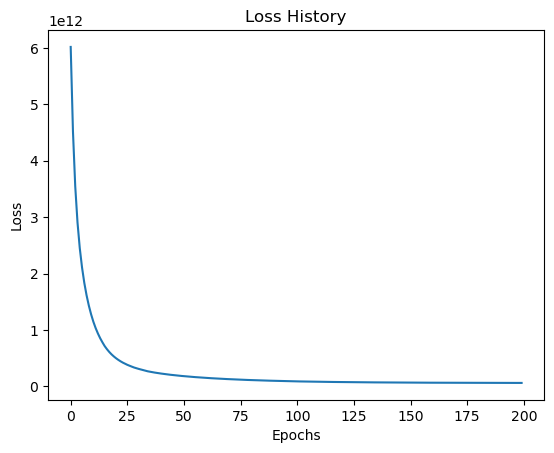

In [155]:


class LinearRegressionPCA:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def backward(self, X, y_true, y_pred):
        dw = -2 / len(X) * np.dot(X.T, (y_true - y_pred))
        db = -2 / len(X) * np.sum((y_true - y_pred))
        return dw, db

    def fit(self, X_train, y_train):
        if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
            X_train = X_train.to_numpy()
        if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        if y_train.ndim == 1:
            y_train = y_train.reshape(-1, 1)

        best_loss = float('inf')
        best_weights = None
        best_bias = None

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(n_samples)
            X_train = X_train[idx]
            y_train = y_train[idx]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, y_pred)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_train_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_train_pred)
            self.loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                best_weights = self.weights.copy()
                best_bias = self.bias

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, loss: {loss:.4f}")

        self.weights = best_weights
        self.bias = best_bias
        print(f"Best model found with loss = {best_loss:.4f}")

    def evaluate(self, X_test, y_test):
        if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()

        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)

        y_test_pred = self.forward(X_test)
        test_loss = self.compute_loss(y_test, y_test_pred)
        print(f"Test Loss: {test_loss:.4f}")

        # Tính toán thủ công các lỗi
        mae = np.mean(np.abs(y_test - y_test_pred))
        mse = np.mean((y_test - y_test_pred) ** 2)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    # Tính R² Score
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_test_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)

        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
        print(f"R2 Score: {r2:.4f}")

        # In ra trọng số và bias
        print("\nFinal Weights:")
        print(self.weights.flatten())  # Hiển thị trọng số dưới dạng mảng 1D
        print("\nFinal Bias:")
        print(self.bias)

        # Vẽ đồ thị dự đoán
        self.plot_actual_vs_predicted(y_test, y_test_pred)
        self.plot_residuals(y_test, y_test_pred)

        return test_loss, y_test_pred

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.show()

    def plot_actual_vs_predicted(self, y_true, y_pred):
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        residuals = y_true - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()


# Train and Evaluate Model
modelPCA = LinearRegressionPCA(learning_rate=0.001, n_epochs=200)
modelPCA.fit(X_train_v2, y_train_v2)
test_loss, y_test_pred = modelPCA.evaluate(X_val_v2, y_val_v2)
modelPCA.plot_loss_history()



Epoch 10, Loss: 1441310322029.1685
Epoch 20, Loss: 762406067748.8501
Epoch 30, Loss: 593858758283.6002
Epoch 40, Loss: 537512120618.9708
Epoch 50, Loss: 512375644720.4376
Epoch 60, Loss: 499164703131.2229
Epoch 70, Loss: 491129425383.1708
Epoch 80, Loss: 485881522211.9659
Epoch 90, Loss: 482548288604.3258
Epoch 100, Loss: 480577319175.3242
Epoch 110, Loss: 479126200727.3932
Epoch 120, Loss: 478400302686.2596
Epoch 130, Loss: 477864170603.8717
Epoch 140, Loss: 477598071106.8339
Epoch 150, Loss: 477455981184.6106
Epoch 160, Loss: 477333840911.6771
Epoch 170, Loss: 477439750873.5183
Epoch 180, Loss: 477237906792.9914
Epoch 190, Loss: 477162056306.2788
Epoch 200, Loss: 477344888767.8793
Best model found with loss = 477153416959.6254


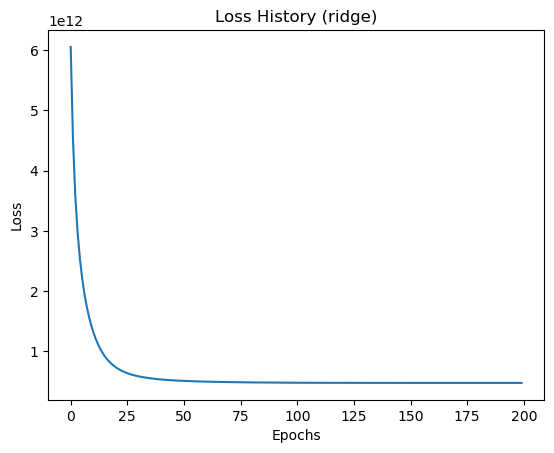

Test Loss: 1105829282772.1006
Mean Absolute Error (MAE): 558000.6564
Mean Squared Error (MSE): 779885054020.1309
Root Mean Squared Error (RMSE): 883111.0089
Mean Absolute Percentage Error (MAPE): 43.7733%
R2 Score: 0.8381

Final Weights:
[ 302801.88335294 1761628.73154283  149421.01104925  -40357.02263274
   35284.37289461  -11598.30078972   -5328.09573375   15923.68279522
  -24287.50105212   13976.64894948  -79309.96400116  172621.12517711
   43901.92298147]

Final Bias:
1688844.506779478


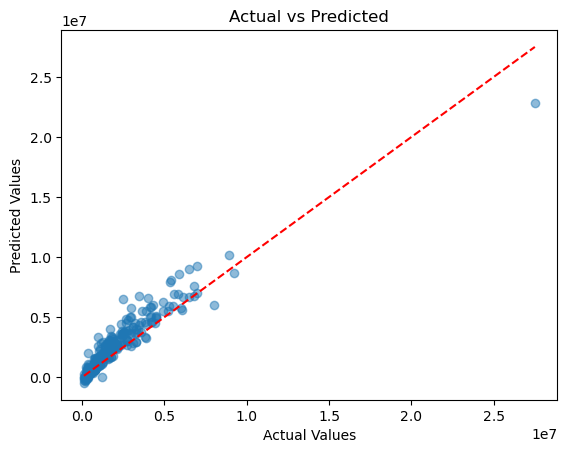

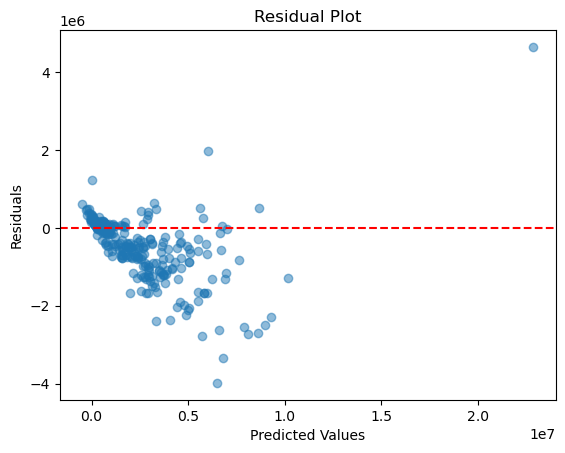

(1105829282772.1006,
 array([[ 9.28463886e+05],
        [ 2.89166661e+05],
        [ 1.58678016e+06],
        [ 4.09754579e+05],
        [ 3.79870354e+06],
        [ 6.62209410e+06],
        [ 1.26842380e+05],
        [ 5.49954486e+06],
        [ 1.22796686e+06],
        [ 2.66224345e+06],
        [-4.04180693e+04],
        [ 6.23309602e+05],
        [ 7.60017822e+05],
        [ 5.00478609e+06],
        [ 5.84021507e+06],
        [ 3.35479462e+06],
        [ 1.90115162e+06],
        [ 1.23381017e+06],
        [ 3.57583369e+06],
        [ 5.43349142e+05],
        [ 2.10861539e+06],
        [ 5.75205807e+05],
        [ 8.57171651e+05],
        [ 1.82365911e+04],
        [ 1.03428203e+06],
        [ 2.17051692e+06],
        [ 5.28018768e+05],
        [ 4.30783224e+05],
        [ 8.25672206e+05],
        [ 6.71448646e+06],
        [ 5.88210296e+05],
        [ 2.22639531e+05],
        [ 2.37554265e+06],
        [ 5.53262735e+05],
        [ 1.89530544e+06],
        [ 1.97771346e+06],
       

In [131]:

class LinearRegressionMultyPCA:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32, regularization=None, alpha=0.1):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.regularization = regularization  # 'ridge' or 'lasso'
        self.alpha = alpha
        self.weights = None
        self.bias = None
        self.loss_history = []

    def compute_loss(self, y_true, y_pred):
        base_loss = np.mean((y_true - y_pred) ** 2)
        if self.regularization == 'ridge':
            reg_loss = self.alpha * np.sum(self.weights ** 2)
        elif self.regularization == 'lasso':
            reg_loss = self.alpha * np.sum(np.abs(self.weights))
        else:
            reg_loss = 0
        return base_loss + reg_loss

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def backward(self, X, y_true, y_pred):
        dw = -2 / len(X) * np.dot(X.T, (y_true - y_pred))
        db = -2 / len(X) * np.sum((y_true - y_pred))
        
        if self.regularization == 'ridge':
            dw += 2 * self.alpha * self.weights
        elif self.regularization == 'lasso':
            dw += self.alpha * np.sign(self.weights)
        
        return dw, db

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(-1, 1)
        
        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        best_loss = float('inf')
        best_weights = None
        best_bias = None

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(n_samples)
            X_train = X_train[idx]
            y_train = y_train[idx]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]
                
                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, y_pred)
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_train_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_train_pred)
            self.loss_history.append(loss)
            
            if loss < best_loss:
                best_loss = loss
                best_weights = self.weights.copy()
                best_bias = self.bias
            
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

        self.weights = best_weights
        self.bias = best_bias
        print(f"Best model found with loss = {best_loss:.4f}")
    
    def evaluate(self, X_test, y_test):
        if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()

        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)

        y_test_pred = self.forward(X_test)
        test_loss = self.compute_loss(y_test, y_test_pred)
        print(f"Test Loss: {test_loss:.4f}")

        # Tính toán thủ công các lỗi
        mae = np.mean(np.abs(y_test - y_test_pred))
        mse = np.mean((y_test - y_test_pred) ** 2)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
            # Tính R² Score
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_test_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)

        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
        print(f"R2 Score: {r2:.4f}")


      
        # In ra trọng số và bias
        print("\nFinal Weights:")
        print(self.weights.flatten())  # Hiển thị trọng số dưới dạng mảng 1D
        print("\nFinal Bias:")
        print(self.bias)

        # Vẽ đồ thị dự đoán
        self.plot_actual_vs_predicted(y_test, y_test_pred)
        self.plot_residuals(y_test, y_test_pred)

        return test_loss, y_test_pred

    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Loss History ({self.regularization})")
        plt.show()

    def plot_actual_vs_predicted(self, y_true, y_pred):
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        residuals = y_true - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()



# Ridge Regression
ridge_model = LinearRegressionMultyPCA(learning_rate=0.001, n_epochs=200, regularization='ridge', alpha=0.1)
ridge_model.fit(X_train_v2, y_train_v2)
ridge_model.plot_loss()
ridge_model.evaluate(X_val_v2, y_val_v2)


Epoch 10, Loss: 1261799157951.2737
Epoch 20, Loss: 529312959921.9852
Epoch 30, Loss: 317074266458.2364
Epoch 40, Loss: 230207539356.1789
Epoch 50, Loss: 182611870444.4516
Epoch 60, Loss: 151505133805.9299
Epoch 70, Loss: 129169261791.9093
Epoch 80, Loss: 112526154907.7013
Epoch 90, Loss: 100140989162.2057
Epoch 100, Loss: 90776783765.6500
Epoch 110, Loss: 83606754534.9288
Epoch 120, Loss: 78270939532.9876
Epoch 130, Loss: 74224757422.0024
Epoch 140, Loss: 71130455039.0727
Epoch 150, Loss: 68776430289.5600
Epoch 160, Loss: 67012029048.0771
Epoch 170, Loss: 65659428280.9535
Epoch 180, Loss: 64606007239.3316
Epoch 190, Loss: 63811755896.6617
Epoch 200, Loss: 63212049351.7992
Best model found with loss = 63212049351.7992


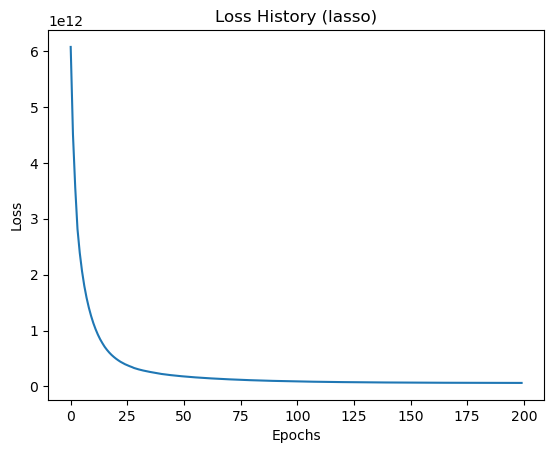

Test Loss: 135171180676.1519
Mean Absolute Error (MAE): 185977.9725
Mean Squared Error (MSE): 135170924597.6207
Root Mean Squared Error (RMSE): 367655.9868
Mean Absolute Percentage Error (MAPE): 19.2947%
R2 Score: 0.9719

Final Weights:
[ 8.46311826e+04  2.26042773e+06  6.05911307e+04 -1.62934106e+04
  6.64073557e+03 -2.53000556e+04  1.71220240e+03 -3.64986820e+03
 -1.65762090e+04  1.38153190e+04 -1.31439976e+04  4.58670920e+04
  1.21363764e+04]

Final Bias:
1688749.5217663292


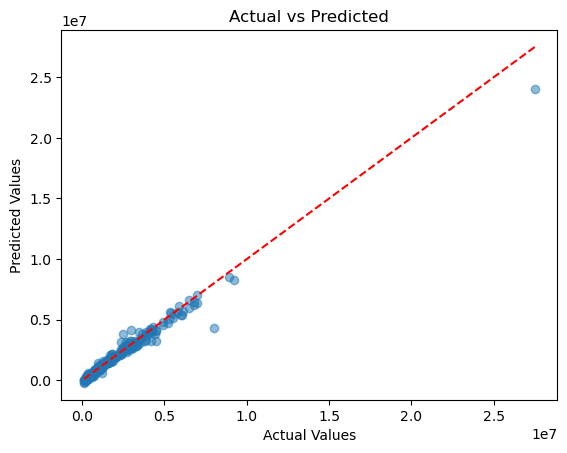

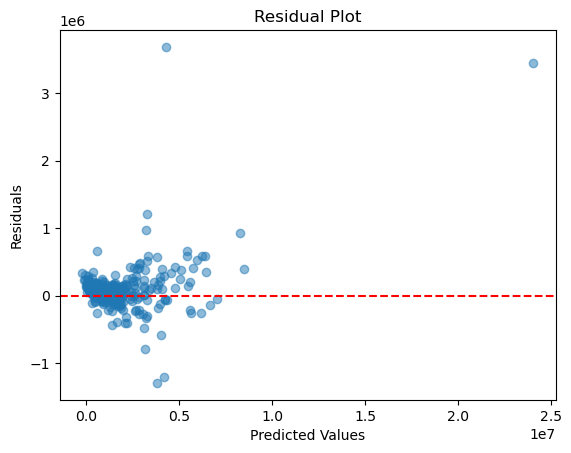

(135171180676.15189,
 array([[ 8.05843358e+05],
        [ 1.45227747e+05],
        [ 9.82392354e+05],
        [ 3.64368837e+05],
        [ 3.16988494e+06],
        [ 3.84611490e+06],
        [ 1.43639029e+05],
        [ 4.77331471e+06],
        [ 1.12206010e+06],
        [ 2.33083433e+06],
        [ 2.90520883e+04],
        [ 5.11611764e+05],
        [ 6.94532307e+05],
        [ 3.22618444e+06],
        [ 4.22307955e+06],
        [ 1.40592774e+06],
        [ 1.47311167e+06],
        [ 8.68711466e+05],
        [ 2.65373136e+06],
        [ 4.09271987e+05],
        [ 1.42456028e+06],
        [ 3.87027621e+05],
        [ 3.25868948e+05],
        [ 1.14868251e+05],
        [ 7.90444125e+05],
        [ 1.09904856e+06],
        [ 1.30755428e+05],
        [ 3.12652257e+05],
        [ 6.50689843e+05],
        [ 5.73301027e+06],
        [ 4.58301991e+05],
        [ 2.18257788e+05],
        [ 1.26024879e+06],
        [ 4.82716616e+05],
        [ 1.37635299e+06],
        [ 1.40962372e+06],
       

In [133]:
# Lasso Regression
lasso_model = LinearRegressionMultyPCA(learning_rate=0.001, n_epochs=200, regularization='lasso', alpha=0.1)
lasso_model.fit(X_train_v2, y_train_v2)
lasso_model.plot_loss()
lasso_model.evaluate(X_val_v2, y_val_v2)